In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib 

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df = pd.read_csv('/home/surendhar/customer-churn-flask/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Data loaded successfully")
print("Shape of the dataset:", df.shape)
# df.info()
# print(50 * "*")
# print(df.describe())
# print(50 * "*")
df.head()

Data loaded successfully
Shape of the dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
print(df['Churn'].value_counts(normalize=True)*100)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


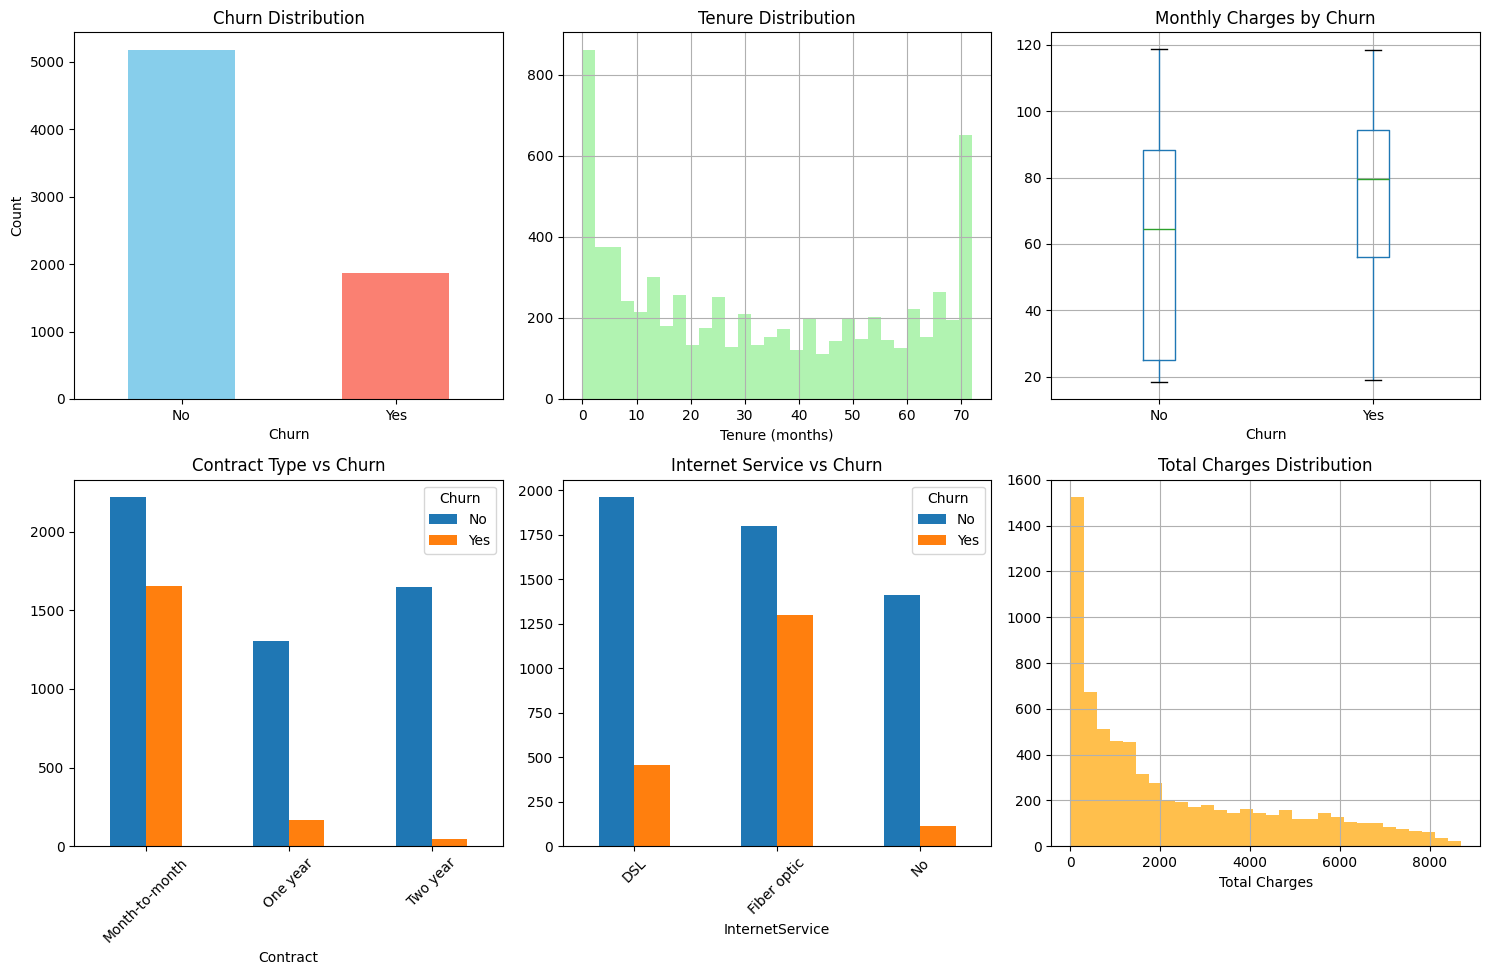

Churn rate by different categories:
By Gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

By Senior Citizen:
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64


In [19]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Churn distribution
plt.subplot(2, 3, 1)
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Tenure distribution
plt.subplot(2, 3, 2)
df['tenure'].hist(bins=30, color='lightgreen', alpha=0.7)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')

# Monthly charges by churn
plt.subplot(2, 3, 3)
df.boxplot(column='MonthlyCharges', by='Churn', ax=plt.gca())
plt.title('Monthly Charges by Churn')
plt.suptitle('')  # Remove default title

# Contract type vs Churn
plt.subplot(2, 3, 4)
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', ax=plt.gca())
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)

# Internet Service vs Churn
plt.subplot(2, 3, 5)
pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar', ax=plt.gca())
plt.title('Internet Service vs Churn')
plt.xticks(rotation=45)

# Total Charges distribution
plt.subplot(2, 3, 6)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].hist(bins=30, color='orange', alpha=0.7)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')

plt.tight_layout()
plt.show()

# Show correlation with target
print("Churn rate by different categories:")
print("By Gender:")
print(df.groupby('gender')['Churn'].apply(lambda x: (x=='Yes').mean()))
print("\nBy Senior Citizen:")
print(df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x=='Yes').mean()))

In [20]:
print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [21]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with the median of 'TotalCharges' and assign the result back to the DataFrame
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

print("Missing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
df_encoded = df.copy()


# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

print("Encoding categorical variables...")
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])
    print(f"{col}: {df[col].nunique()} categories -> encoded")

Encoding categorical variables...
gender: 2 categories -> encoded
Partner: 2 categories -> encoded
Dependents: 2 categories -> encoded
PhoneService: 2 categories -> encoded
MultipleLines: 3 categories -> encoded
InternetService: 3 categories -> encoded
OnlineSecurity: 3 categories -> encoded
OnlineBackup: 3 categories -> encoded
DeviceProtection: 3 categories -> encoded
TechSupport: 3 categories -> encoded
StreamingTV: 3 categories -> encoded
StreamingMovies: 3 categories -> encoded
Contract: 3 categories -> encoded
PaperlessBilling: 2 categories -> encoded
PaymentMethod: 4 categories -> encoded
Churn: 2 categories -> encoded


In [23]:
# print(df['gender'].unique())

In [24]:
# Prepare features and target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']



print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")


Feature matrix shape: (7043, 19)
Target vector shape: (7043,)
Feature columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts(normalize=True))

Training set: (5634, 19)
Test set: (1409, 19)
Training target distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


In [26]:

# Scale the features (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Feature names saved: {list(X.columns)}")

Features scaled successfully!
Feature names saved: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [27]:
#Intitialize models
models = {
    'logistic' : LogisticRegression(random_state=42, max_iter=100),
    'random-fore' : RandomForestClassifier(n_estimators=100 , random_state=42),
}

In [28]:
# Train and evaluate models
results = {}
trained_models = {}

print("Training models...")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    print("="*60)
    
    if name == 'logistic':
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    
    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
      # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    trained_models[name] = model
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Training models...

Training logistic...


logistic Results:
Accuracy: 0.7991
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

----------------------------------------

Training random-fore...
random-fore Results:
Accuracy: 0.7921
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

----------------------------------------


In [30]:
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]


print(f"🏆 Best Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]:.4f}")

🏆 Best Model: logistic
Best Accuracy: 0.7991


In [ ]:
joblib.dump(best_model, '../models/churn_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(list(X.columns), '../models/feature_names.pkl')

print("\n✅ Model saved successfully!")
print("Files saved:")
print("- ../models/churn_model.pkl")
print("- ../models/scaler.pkl") 
print("- ../models/feature_names.pkl")

# Show feature importance (if Random Forest won)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features:")
    print(feature_importance.head(10))


✅ Model saved successfully!
Files saved:
- ../models/churn_model.pkl
- ../models/scaler.pkl
- ../models/feature_names.pkl
